# Python Notebook: <u> Graph Plotting and Linear Fitting for Experimental Lab
# University of York, Department of Physics

This python notebook reads x-y data, with errors if used, from a data file and plots a graph. If required, a linear least-squares fit is perfomed to determine the gradient and intercept with errors.

<i> Version 1.1, November 3rd 2020. This notebook was written by Mike Bentley, University of York. Feel free to copy, use and adapt for your own purposes. Any suggestions for improvement to michael.bentley@york.ac.uk. [Thanks to Sachin Mysorekar for testing and useful additions] 

This version has been updated to include the option of using a comma-separated (i.e. .csv) data file. </i>  

Instructions:

Part 1: (User preferences and options)
    1. Enter file name containing data
    2. Enter User preferences (see comments for instructions)
Part 2: (code)
    3. Run the "Check Data File" section to check that all the data is read in properly
    4. Run the rest of the cells in the notebook
Part 3: (Graph)
    5. Modify the options in the final cell for secific graph options

# Part 1:  User data and preferences

## Enter name of file containing data

Data file needs to be in the same directory as this notebook. Otherwise, put in the full path.

Data file should be a plain text file with data in columns and no other entries. The separator between data points can be spaces, tabs or commas. If saving data from Excel, Origin, etc, save as "Tab delimited" (.txt) file or a Comma separated (i.e. .csv) file. 
    
The data file can have as many columns as you like. In the cell below you will specify which columns contain the required parameters.

In [1]:
Filename="data_fitting_test.txt"

## Enter user preferences 

Here you need to specify the columns, and other preferences

In [2]:
xcolumn = 1                   # Specify the column containing the x data points 
ycolumn = 2                   # Specify the column containing the y data points 
include_x_errors = False      # Enter True or False only (True if x errors needed on plot)
include_y_errors = True       # Enter True or False only (True if y errors needed on plot)
xerrcolumn = 3                # Specify the column containing the x errors 
yerrcolumn = 4                # Specify the column containing the y errors 
fit_line = True               # Enter True or False only (True if line of best fit needed)
header = True                 # Does your data file contain one of more header lines (e.g. column titles)
head_lines = 1                # Enter the number of header lines in your data file
save_graph = True             # Enter True or False only (True if you wish to save the figure)
CSV=False                     # Is the data separated by commas (True if yes - e.g. a .csv file)

Specify the name of the file if you wish to save the graph. (It will be saved in the same directory as this notebook). The format of the file is determined by the file extension, e.g. $\texttt{.jpg, .pdf, .png}$

In [3]:
fig_file="figure.png"

## Check data file 

This script will check the data file, count the number of data points, make sure that there are no anomalies, check for blank lines, and print out the first and last line of the data file for you to check.

In [4]:
raw_data = open(Filename,'r')          # Open the data file for input

lines=0                                # This counts the number of data lines that have been read
first=True                             # A flag is set for the first non-blank line found
warning=False                          # A warning flag for a unexpected number of data points in a row 
blank_lines=0                          # This counts the number of blank lines found

# Skip any header lines
if header:                             # Are there any header rows?
    for i in range(head_lines):
        next(raw_data)                 # Skip each header row

# Now we loop through every line in the file

for data_line in raw_data:             # loops through the file, one line at a time
        row = data_line.strip()    # "row" is now a string variable contains the text of that line
        
# check for blank lines
        if row == "":                  # is it blank?
            blank_lines=blank_lines+1  # counts the number of blank lines
            continue                   # skip straight to the next line (i.e. the next step of the loop)
        elif CSV and row.strip(',')=="": # is it just commas?
            blank_lines=blank_lines+1  # counts the number of blank lines
            continue                   # skip straight to the next line (i.e. the next step of the loop)

# for a non-blank line, split the line into columns
        lines = lines + 1              # counts the number of lines of data
        if CSV:                        # is it a CSV?
            data = row.split(',')      # split line into data points ("data" is now a list of strings)
        else:                          # it's not a CSV
            data = row.split()         # split line into data points ("data" is now a list of strings)
        num_values = len(data)         # counts the number of data points in the line
        
# Checks the number of data points is the same as in the last line

        if first:                      # Is it the first line? (no check possible)
            first=False                # Resets the flag
            first_row = row            # Stores the first row of data
        elif num_values != num_last:   # checks if number of data points is different from last row
            warning=True               # Sets a warning flag
        num_last = num_values          # Stores current number of data points for the next comparison
        last_row = row                 # Stores the most recent (i.e. last) row of data

# Now we have finished reading the file

raw_data.close()                       # Close the data file

# Tell the user what we have found
if warning:
    print("\n \n WARNING \n WARNING - COLUMNS do not have the same number of data points \n WARNING\n")
print("\n",lines,"rows of data, in",num_last,"columns, found in file")
print("",blank_lines,"blank lines found in file, and",head_lines,"lines of headers skipped") 
print("\n First data row:",first_row)
print(" Last data row:",last_row)


 10 rows of data, in 4 columns, found in file
 0 blank lines found in file, and 1 lines of headers skipped

 First data row: 2.1	24.9	0.042	5
 Last data row: 20.5	95	0.41	5


# Part 2: Code (run, but don't modify)

Now run all the cells below to read the data file into arrays, perform the fits and plot the graph

## Read data file

In [5]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt

raw_data = open(Filename,'r')              # Open the data file again

# Skip any header lines
if header:                                 # Are there any header rows?
    for i in range(head_lines):
        next(raw_data)                     # Skip each header row

# Set up the arrays for storing data:
x_data = np.zeros(lines)        # Defines array for the x data points, and sets each of the elements to zero
y_data = np.zeros(lines)        # Defines array for the y data points, and sets each of the elements to zero
x_err = np.zeros(lines)         # Defines array for the x error bars, and sets each of the elements to zero
y_err = np.zeros(lines)         # Defines array for the y error bars, and sets each of the elements to zero

# Read the data:
i=0
for data_line in raw_data:                        # loops through the file, one line at a time
        row = data_line.strip()                   # row is a string variable contains the text of that line
        if row == "":                             # skip any blank lines
            continue
        elif CSV and row.strip(',')=="":          # is it just commas?
            continue                              # skip straight to the next line (i.e. the next step of the loop)
        else:
            if CSV:
                data = row.split(',')             # split line into data points ("data" is now a list of strings)
            else:
                data = row.split()                # split line into data points ("data" is now a list of strings)
        x_data[i] = float(data[xcolumn-1])        # put the x data point, from the right column, in the x array
        y_data[i] = float(data[ycolumn-1])        # put the y data point, from the right column, in the y array
        if include_x_errors:
            x_err[i] = float(data[xerrcolumn-1])  # put the x error bar in the x error array, if used
        if include_y_errors:
            y_err[i] = float(data[yerrcolumn-1])  # put the y error bar in the y error array, if used
        i=i+1                                     # counts the number of data lines read
print("\n",i,"rows of data successfully stored in arrays") 
raw_data.close()


 10 rows of data successfully stored in arrays


## Perform the linear fit

In [6]:
# Performs a fit calling the numpy polyfit function (polynomial order 1):

# If y errors are included, they will be used as weights in the fit calculation:

if include_y_errors:                                           # Are y errors are included?
    weights=1/y_err                                            # fit "weights" are the inverse of the y errors
    para,covar=np.polyfit(x_data,y_data,1,w=weights,cov=True)  # Performs a "weighted" fit
else:
    para,covar=np.polyfit(x_data,y_data,1,cov=True)            # Performs an "unweighted" fit

# Extract the parameters from the fit:

errors=np.sqrt(np.diag(covar))                  # Creates a list called "errors" from the covariance matrix
grad = para[0]                                  # gradient is the first entry in the "para" list
grad_error = errors[0]                          # error on gradient is the first entry in the "errors" list
inter = para[1]                                 # intercept is the second entry in the "para" list
inter_error = errors[1]                         # error on intercept is the second entry in the "errors" list


x_fit=[min(x_data),max(x_data)]
y_fit=[grad*min(x_data)+inter,grad*max(x_data)+inter]

# Part 3: Plotting the graph (edit this part)

There are several options for plotting that you can modify. Some are commented out with a $\#$. Remove the $\#$ to activate them.
 - $\texttt{x}\_\texttt{lim( )}$, $\texttt{y}\_\texttt{lim( )}$ set the axis ranges
 - $\texttt{x}\_\texttt{ticks( )}$, $\texttt{y}\_\texttt{ticks( )}$ set the properties of the x and y labels. You can also use these functions to specify custom tick points and custom labels. For example, $\texttt{x}\_\texttt{ticks((2,4,6,8),fontsize=12)}$ will put four labels at x = 2,4,6 and 8 with fontisize 12.
 - $\texttt{text( )}$ puts some text on the plot. Note the co-ordinates of the text are in the data co-ordinate system, so the position has the same units as x and y.  
 - Wherever there is text on the graph i.e. $\texttt{title( ), text( ), xticks( ), xlabel( )}$ etc, you can modify the text properties using a number of arguments. e.g. $\texttt{fontsize =} $ (e.g. 10), $\texttt{color = }$ (e.g. 'black'), $\texttt{fontsyle =}$ (e.g. 'normal' or 'italic'), $\texttt{weight =}$ (e.g. 'normal' or 'bold' etc). You can also change the font using $\texttt{fontfamily =} $ ('arial', or 'calibri', or 'times new roman' etc)
 - To insert special symbols, superscripts, etc, you can use the LaTeX maths environment by putting commands within dollar signs $\$$ $\$$. Examples include $\texttt{x}\$\texttt{^{-2}}\$ $ for x$^{-2}$, $\$\texttt{\pm}\$ $ for $\pm$, $\$\texttt{\sigma}\$ $ for $\sigma$, etc. 
 - You can find many many other tricks to format your graph on the [matplotlib.pyplot web page]
(https://matplotlib.org/3.1.1/api/pyplot_summary.html) 

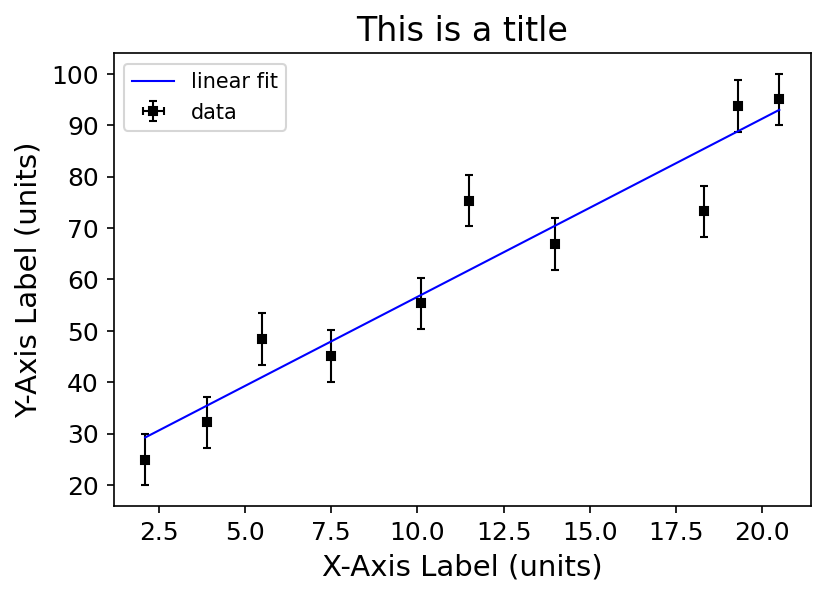


Fit Results:

Gradient: 3.4634064603268477 +/- 0.38434029280327486
Intercept: 21.967409192116396 +/- 4.957855703154267


In [7]:
plt.rcParams['figure.dpi'] = 150   # Controls the size and resolution of the figures as displayed in Jupyter

plt.errorbar(x_data,y_data,yerr=y_err,xerr=x_err,fmt='s',color='black',markersize=4,elinewidth=1,capsize=2,label='data')

if fit_line:
    plt.plot(x_fit,y_fit,'-',color='blue',linewidth=1, label="linear fit")
    
#plt.xlim(0,2.5)
#plt.ylim(0,25)
plt.xlabel('X-Axis Label (units)',fontsize=14)
plt.ylabel('Y-Axis Label (units)',fontsize=14)
plt.title("This is a title",fontsize=16,loc="center")
#plt.minorticks_on()
#plt.text(7.5,95,"Here is some text on the graph",color='red',fontsize=10,weight="normal",fontstyle="italic")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
#plt.grid(True)

if save_graph:
    plt.savefig(fig_file,dpi=500)

plt.show()

if fit_line:
    print("\nFit Results:\n")
    print("Gradient:",grad,"+/-",grad_error)
    print("Intercept:",inter,"+/-",inter_error)